# NMF via multiplicative update

In [2]:
import numpy as np
from numpy.linalg import norm

In [3]:
def myNMF(V, r, steps=500, tol=1e-6):
    
    # List to hold the loss value per iteration
    loss = []
    
    # Random initialization of weights
    W = np.random.rand(V.shape[0], r)
    H = np.random.rand(r, V.shape[1])

    # A very big number for initial error
    old_error = np.inf
    
    for i in range(steps):

        # Multiplicative update steps
        H = H * ( (W.T @ V) / (W.T @ W @ H) )
        W = W * ( (V @ H.T) / (W @ H @ H.T) )

        # calculate error: Frobenius distance between WH and V
        error = norm( (V - W @ H), 'fro')

        # Check for convergence
        if abs(old_error - error) < tol:
            print('Stopped due to reaching tolerance!')
            break
        
        old_error = error

        if (i+1) % 50 == 0:
            print('Iter: {0}, Loss: {1:.4f}'.format(i, error))

        loss.append(error)
    
    return W, H, loss

In [4]:
np.random.seed(0)

d = 200
N = 1000
r = 10
# create random data matrix 
V = np.random.rand(d, r) @ np.random.rand(r, N) 
V = V + np.random.normal(scale=0.5, size=(d,N))
V[V < 0] = 0

myNMF(V, r)

Iter: 49, Loss: 245.3603
Iter: 99, Loss: 234.9932
Iter: 149, Loss: 227.2434
Iter: 199, Loss: 222.6758
Iter: 249, Loss: 220.1029
Iter: 299, Loss: 218.7010
Iter: 349, Loss: 217.9789
Iter: 399, Loss: 217.6320
Iter: 449, Loss: 217.4595
Iter: 499, Loss: 217.3651


(array([[0.85199639, 0.48941675, 0.67071689, ..., 0.31294745, 1.05031372,
         0.4591898 ],
        [0.56744049, 0.32512131, 0.46174012, ..., 0.53403929, 1.20695011,
         0.32469698],
        [0.82238954, 0.0627679 , 0.86204741, ..., 0.34532948, 0.87268122,
         0.07734868],
        ...,
        [0.1764572 , 0.00281761, 0.31396411, ..., 0.03749382, 0.58004013,
         0.53368256],
        [0.51033279, 0.63164075, 0.78994657, ..., 0.88537736, 0.49834442,
         0.7518328 ],
        [1.05402391, 0.52360005, 0.58816999, ..., 0.49387377, 0.36769642,
         0.47057468]]),
 array([[0.51381436, 0.49587252, 0.42784534, ..., 0.70363525, 0.60349712,
         0.50659981],
        [0.15577391, 0.35409966, 0.24461848, ..., 0.50787372, 0.98148504,
         0.4147462 ],
        [0.7124798 , 0.36228665, 0.91623195, ..., 0.93749046, 0.8598272 ,
         0.20790726],
        ...,
        [0.02159489, 0.58193159, 0.69430789, ..., 0.37483717, 0.70365693,
         0.74333412],
        [0.5

***

# NMF in sklearn

## - Market movement analysis

In [11]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.decomposition import NMF
from sklearn.cluster import KMeans

np.random.seed(0)

In [8]:
dow_jones = pd.read_csv('data/dow_jones_index.data')

data = dow_jones.pivot(index='stock', columns='date', values='close')
data = data.replace('[\$,]', '', regex=True).astype(float)

data.head()

date,1/14/2011,1/21/2011,1/28/2011,1/7/2011,2/11/2011,2/18/2011,2/25/2011,2/4/2011,3/11/2011,3/18/2011,...,4/29/2011,4/8/2011,5/13/2011,5/20/2011,5/27/2011,5/6/2011,6/10/2011,6/17/2011,6/24/2011,6/3/2011
stock,,,,,,,,,,,,,,,,,,,,,
AA,15.97,15.79,16.13,16.42,17.37,17.28,16.68,17.14,16.03,16.11,...,17.00,17.92,17.10,16.26,16.48,17.15,15.28,14.72,15.23,15.92
AXP,46.25,46.00,43.86,44.36,46.75,45.53,43.53,43.82,44.28,44.17,...,49.08,46.28,49.49,51.19,51.13,50.20,47.74,48.50,48.34,49.28
BA,70.07,71.68,69.23,69.38,72.14,73.04,72.30,71.38,71.64,69.10,...,79.78,73.47,79.03,77.52,76.99,79.31,72.69,74.16,71.26,74.84
BAC,15.25,14.25,13.60,14.25,14.77,14.75,14.20,14.29,14.38,14.04,...,12.28,13.48,11.93,11.58,11.69,12.31,10.80,10.68,10.52,11.28
CAT,94.01,92.75,95.68,93.73,103.54,105.86,102.00,99.59,100.02,105.06,...,115.41,109.82,106.33,104.33,104.60,110.34,96.79,95.95,100.01,101.10


In [9]:
data.shape

(30, 25)

In [10]:
V= data.T

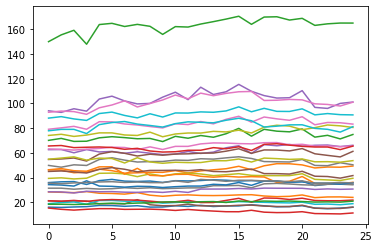

In [12]:
plt.figure()
plt.plot(V.values)
plt.show()

In [13]:
model = NMF(n_components=5, init='random', random_state=0, max_iter=10000)

# fit the model and get the basis matrix, which should have size (n_features, n_components)
W = model.fit_transform(V)
print(W.shape)

# get the coefficient matrix H, which should have size (n_components, n_samples)
H = model.components_
print(H.shape)

(25, 5)
(5, 30)


In [14]:
# kmeans treats row as training example, so transpose H
kmeans = KMeans(n_clusters=7, random_state=0).fit(H.T)

# generate clustering labels for each training example
labels = kmeans.labels_

for i in range(7):
    print("Stock group {0}: ".format(i) + str(V.columns[ labels == i ].values))

Stock group 0: ['AA' 'AXP' 'DD' 'DIS' 'GE' 'HD' 'INTC' 'KRFT' 'MRK' 'PFE' 'T' 'VZ' 'WMT']
Stock group 1: ['CAT']
Stock group 2: ['JNJ' 'KO' 'MCD' 'PG']
Stock group 3: ['IBM']
Stock group 4: ['BA' 'TRV' 'UTX']
Stock group 5: ['BAC' 'CSCO' 'HPQ' 'JPM' 'MSFT']
Stock group 6: ['CVX' 'MMM' 'XOM']


## - Topic modeling

In [16]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.datasets import fetch_20newsgroups
from sklearn.decomposition import NMF

In [17]:
n_samples = 2000
dataset = fetch_20newsgroups(shuffle=True, random_state=1, remove=('headers', 'footers', 'quotes'))
data_samples = dataset.data[:n_samples]

In [18]:
n_features = 1000
tfidf_vectorizer = TfidfVectorizer(max_df=0.95, min_df=2, max_features=n_features, stop_words='english')
tfidf_feature = tfidf_vectorizer.fit_transform(data_samples)

In [19]:
# Transpose the data so that we have rows as features (1000) and columns as samples (2000)
tfidf_feature= tfidf_feature.T
tfidf_feature.shape

(1000, 2000)

In [20]:
nmf = NMF(n_components=10, init='random', random_state=0, max_iter=10000)
W = nmf.fit_transform(tfidf_feature)
W.shape # of size (n_features, n_topics)

(1000, 10)

In [22]:
def print_top_words(model, feature_names, n_top_words):
    for topic_idx, topic in enumerate(W.T):
        message = "Topic #{}: ".format(topic_idx)
        message += " ".join([feature_names[i] for i in topic.argsort()[::-1][:n_top_words]])
        print(message)

n_top_words = 5

tfidf_feature_names = tfidf_vectorizer.get_feature_names_out()
print_top_words(nmf, tfidf_feature_names, n_top_words)

Topic #0: just don like think ve
Topic #1: edu soon com send university
Topic #2: drive drives hard card disk
Topic #3: windows file dos using program
Topic #4: thanks know does mail advance
Topic #5: people did time government law
Topic #6: game team year games win
Topic #7: key chip clipper keys encryption
Topic #8: god jesus bible faith does
Topic #9: car new 00 bike 10


## - Face feature extraction

In [24]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.datasets import fetch_lfw_people
from sklearn.decomposition import NMF

In [25]:
lfw_people = fetch_lfw_people(min_faces_per_person=50, resize=0.4)

# Images in the LFW dataset are 50*37 pixels in size.
# Therefore 1850 features in total.
# n_samples is the number of images

n_samples, row_dim, col_dim = lfw_people.images.shape
V = lfw_people.data
# Transpose the data so that we have rows as features (1850) and columns as samples (1560)
V= V.T
print(V.shape)

(1850, 1560)


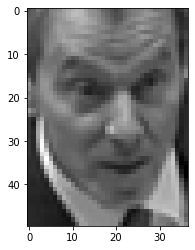

In [26]:
plt.imshow(V[:,0].reshape((row_dim, col_dim)), cmap=plt.cm.gray)
plt.show()

In [27]:
# try to increase the max_iter for better results. But it will be more time consuming
model = NMF(n_components=50, init='random', random_state=0, max_iter=500)

W = model.fit_transform(V)
H = model.components_

C:\Users\Public\anaconda3\lib\site-packages\sklearn\decomposition\_nmf.py:1637: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


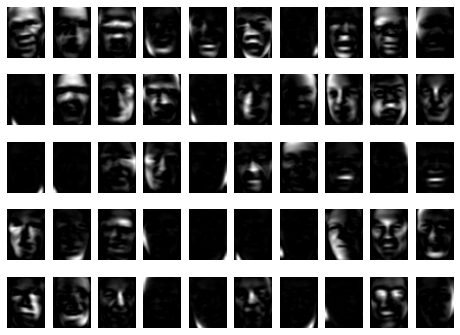

In [28]:
fig, axarr = plt.subplots(5, 10, figsize=(8, 6))

axarr_list = np.ravel(axarr)

for i in range(50):
    # each column of W represent one basis vector
    axarr_list[i].imshow(W[:,i].reshape((row_dim, col_dim)), cmap=plt.cm.gray)
    axarr_list[i].axis('off')
plt.show()   

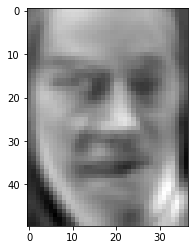

In [29]:
V_Approx= np.dot(W, H) 

plt.imshow(V_Approx[:, 0].reshape((row_dim, col_dim)), cmap=plt.cm.gray)
plt.show()